# BEDU
# Prototype Day

## COVID - 19 en México

Se analiza la información referente a casos COVID-19 en México, conjunto de datos obtenido de: https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico

* FECHA_ACTUALIZACION	La base de datos se alimenta diariamente, esta variable permite identificar la fecha de la ultima actualizacion.
* ID_REGISTRO	Número identificador del caso
* ORIGEN	
* SECTOR	Identifica el tipo de institución del Sistema Nacional de Salud que brindó la atención.
* ENTIDAD_UM	Identifica la entidad donde se ubica la unidad medica que brindó la atención.
* SEXO	Identifica al sexo del paciente.
* ENTIDAD_NAC	Identifica la entidad de nacimiento del paciente.
* ENTIDAD_RES	Identifica la entidad de residencia del paciente.
* MUNICIPIO_RES	Identifica el municipio de residencia del paciente.
* TIPO_PACIENTE	Identifica el tipo de atención que recibió el paciente en la unidad. Se denomina como ambulatorio si regresó a su casa o se denomina como hospitalizado si fue ingresado a hospitalización.
* FECHA_INGRESO	Identifica la fecha de ingreso del paciente a la unidad de atención.
* FECHA_SINTOMAS	Idenitifica la fecha en que inició la sintomatología del paciente.
* FECHA_DEF	Identifica la fecha en que el paciente falleció.
* INTUBADO	Identifica si el paciente requirió de intubación.
* NEUMONIA	Identifica si al paciente se le diagnosticó con neumonía.
* EDAD	Identifica la edad del paciente.
* NACIONALIDAD	Identifica si el paciente es mexicano o extranjero.
* EMBARAZO	Identifica si la paciente está embarazada.
* HABLA_LENGUA_INDIG	Identifica si el paciente habla lengua índigena.
* INDIGENA	Identifica si el paciente se autoidentifica como una persona indígena. 
* DIABETES	Identifica si el paciente tiene un diagnóstico de diabetes. 
* EPOC	Identifica si el paciente tiene un diagnóstico de EPOC. 
* ASMA	Identifica si el paciente tiene un diagnóstico de asma. 
* INMUSUPR	Identifica si el paciente presenta inmunosupresión.
* HIPERTENSION	Identifica si el paciente tiene un diagnóstico de hipertensión. 
* OTRAS_COM	Identifica si el paciente tiene diagnóstico de otras enfermedades.
* CARDIOVASCULAR	Identifica si el paciente tiene un diagnóstico de enfermedades cardiovasculares. 
* OBESIDAD	Identifica si el paciente tiene diagnóstico de obesidad.
* RENAL_CRONICA	Identifica si el paciente tiene diagnóstico de insuficiencia renal crónica.
* TABAQUISMO	Identifica si el paciente tiene hábito de tabaquismo.
* OTRO_CASO	Identifica si el paciente tuvo contacto con algún otro caso diagnósticado con SARS CoV-2
* TOMA_MUESTRA_LAB	Identifica si al paciente se le tomó muestra de laboratorio.
* RESULTADO_LAB	Identifica el resultado del análisis de la muestra reportado por el  laboratorio de la Red Nacional de Laboratorios de Vigilancia Epidemiológica (INDRE, LESP y LAVE) y laboratorios privados avalados por el InDRE cuyos resultados son registrados en SISVER. (Catálogo de resultados diagnósticos anexo).
* TOMA_MUESTRA_ANTIGENO	Identifica si al paciente se le tomó muestra de antígeno para SARS-CoV-2
* RESULTADO_ANTIGENO	Identifica el resultado del análisis de la muestra de antígeno tomada al paciente
* CLASIFICACION_FINAL	Identifica si el paciente es un caso de COVID-19 según el catálogo "CLASIFICACION_FINAL".
* MIGRANTE	Identifica si el paciente es una persona migrante.
* PAIS_NACIONALIDAD	Identifica la nacionalidad del paciente.
* PAIS_ORIGEN	Identifica el país del que partió el paciente rumbo a México.
* UCI	Identifica si el paciente requirió ingresar a una Unidad de Cuidados Intensivos.


In [ ]:
! pip install -U scikit-learn

     |████████████████████████████████| 23.2 MB 1.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
# Importamos pandas para cargar nuestro csv
import pandas as pd
# Librerías para visualización de datos 
import seaborn as sns 
import matplotlib.pyplot as plt
# Librerías para regresión lineal 
from sklearn.linear_model import LinearRegression
# Librerías para modelado 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
# Import numpy 
import numpy as np

In [ ]:
df = pd.read_csv("/content/211104COVID19MEXICO.csv")
#Imprimimos encabezado para comprobar que se cargó correctamente
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-11-04,z482b8,2,12,9,2,9,9,12,1,2020-10-16,2020-10-16,9999-99-99,97,2,41,1,97,99,99,2,2,2,2,2,2,2,2,2,2,2,2.0,97.0,2.0,97.0,1.0,99.0,México,97,97.0
1,2021-11-04,z49a69,1,12,23,1,23,23,4,2,2020-07-20,2020-07-17,2020-07-21,1,1,66,1,2,2,2,1,2,2,2,1,2,2,1,2,2,1,2.0,97.0,2.0,97.0,2.0,99.0,México,97,1.0
2,2021-11-04,z23d9d,1,12,22,2,24,22,9,1,2021-01-05,2021-01-05,9999-99-99,97,2,29,1,97,2,2,2,2,2,2,2,2,2,98,2,2,2,2.0,97.0,2.0,97.0,6.0,99.0,México,97,97.0
3,2021-11-04,z24953,1,12,9,1,9,9,10,1,2020-10-15,2020-10-15,9999-99-99,97,2,40,1,98,99,99,2,2,2,2,2,2,2,2,2,2,1,1.0,2.0,2.0,97.0,7.0,99.0,México,97,97.0
4,2021-11-04,zz8e77,2,12,9,2,9,9,2,1,2020-04-16,2020-04-10,9999-99-99,97,2,34,1,97,2,2,2,1,1,2,2,2,2,2,2,2,2,2.0,97.0,2.0,97.0,6.0,99.0,México,97,97.0


In [ ]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [ ]:
df.describe()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,UCI
count,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151146e+06,1.151145e+06,1.151145e+06,1.151145e+06,1.151145e+06,1.151145e+06,1.151145e+06,1.151145e+06
mean,1.622051e+00,9.043052e+00,1.541415e+01,1.499201e+00,1.636658e+01,1.565496e+01,3.840302e+01,1.196096e+00,7.906703e+01,3.182650e+00,4.211402e+01,1.005019e+00,4.975005e+01,5.149477e+00,4.986349e+00,2.192278e+00,2.275673e+00,2.257507e+00,2.310129e+00,2.131447e+00,2.450416e+00,2.276471e+00,2.125582e+00,2.270883e+00,2.229414e+00,1.841527e+01,1.119200e+00,1.300295e+01,1.999934e+00,9.699372e+01,5.146322e+00,9.862019e+01,7.908887e+01
std,4.848751e-01,3.700380e+00,8.243334e+00,4.999996e-01,1.003343e+01,8.167809e+00,4.883796e+01,3.970421e-01,3.723843e+01,1.126948e+01,1.689465e+01,7.066935e-02,4.751039e+01,1.722188e+01,1.679633e+01,5.510411e+00,5.272497e+00,5.252085e+00,5.567450e+00,5.303923e+00,6.755885e+00,5.331122e+00,5.228587e+00,5.263219e+00,5.451725e+00,3.697443e+01,3.240233e-01,3.090731e+01,8.125080e-03,7.725271e-01,1.920815e+00,6.067695e+00,3.719954e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,9.000000e+00,1.000000e+00,9.000000e+00,9.000000e+00,7.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,9.700000e+01,3.000000e+00,9.900000e+01,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.400000e+01,1.000000e+00,1.500000e+01,1.500000e+01,2.100000e+01,1.000000e+00,9.700000e+01,2.000000e+00,4.100000e+01,1.000000e+00,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,9.700000e+01,6.000000e+00,9.900000e+01,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.200000e+01,2.000000e+00,2.400000e+01,2.200000e+01,5.000000e+01,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,1.000000e+00,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,9.700000e+01,7.000000e+00,9.900000e+01,9.700000e+01
max,2.000000e+00,1.300000e+01,3.200000e+01,2.000000e+00,9.900000e+01,3.200000e+01,9.990000e+02,2.000000e+00,9.900000e+01,9.900000e+01,1.200000e+02,2.000000e+00,9.800000e+01,9.900000e+01,9.900000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.900000e+01,2.000000e+00,9.700000e+01,2.000000e+00,9.700000e+01,7.000000e+00,9.900000e+01,9.900000e+01


In [ ]:
# Exploramos los tipos de datos de las columnas
df.dtypes

FECHA_ACTUALIZACION       object
ID_REGISTRO               object
ORIGEN                     int64
SECTOR                     int64
ENTIDAD_UM                 int64
SEXO                       int64
ENTIDAD_NAC                int64
ENTIDAD_RES                int64
MUNICIPIO_RES              int64
TIPO_PACIENTE              int64
FECHA_INGRESO             object
FECHA_SINTOMAS            object
FECHA_DEF                 object
INTUBADO                   int64
NEUMONIA                   int64
EDAD                       int64
NACIONALIDAD               int64
EMBARAZO                   int64
HABLA_LENGUA_INDIG         int64
INDIGENA                   int64
DIABETES                   int64
EPOC                       int64
ASMA                       int64
INMUSUPR                   int64
HIPERTENSION               int64
OTRA_COM                   int64
CARDIOVASCULAR             int64
OBESIDAD                   int64
RENAL_CRONICA              int64
TABAQUISMO                 int64
OTRO_CASO 

In [ ]:
#Comando shape para conocer registros y columnas
df.shape

(1151146, 40)

In [ ]:
# Seleccionamos únicamente columnas binarias 
df_entsex = df[['ENTIDAD_UM','SEXO','EDAD','INTUBADO','NEUMONIA','EMBARAZO','DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION','OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO','OTRO_CASO']]
df_entsex = df_entsex.replace({'INTUBADO':2,'NEUMONIA':2,'EMBARAZO':2,'DIABETES':2,'EPOC':2,'ASMA':2,'INMUSUPR':2,'HIPERTENSION':2,'OTRA_COM':2,'CARDIOVASCULAR':2,'OBESIDAD':2,'RENAL_CRONICA':2,'TABAQUISMO':2,'OTRO_CASO':2}, 0)
df_entsex = df_entsex.replace({'INTUBADO':97,'NEUMONIA':97,'EMBARAZO':97,'DIABETES':97,'EPOC':97,'ASMA':97,'INMUSUPR':97,'HIPERTENSION':97,'OTRA_COM':97,'CARDIOVASCULAR':97,'OBESIDAD':97,'RENAL_CRONICA':97,'TABAQUISMO':97,'OTRO_CASO':97}, 0)
df_entsex = df_entsex.replace({'INTUBADO':98,'NEUMONIA':98,'EMBARAZO':98,'DIABETES':98,'EPOC':98,'ASMA':98,'INMUSUPR':98,'HIPERTENSION':98,'OTRA_COM':98,'CARDIOVASCULAR':98,'OBESIDAD':98,'RENAL_CRONICA':98,'TABAQUISMO':98,'OTRO_CASO':98}, 0)
df_entsex = df_entsex.replace({'INTUBADO':99,'NEUMONIA':99,'EMBARAZO':99,'DIABETES':99,'EPOC':99,'ASMA':99,'INMUSUPR':99,'HIPERTENSION':99,'OTRA_COM':99,'CARDIOVASCULAR':99,'OBESIDAD':99,'RENAL_CRONICA':99,'TABAQUISMO':99,'OTRO_CASO':99}, 0)
# Agrupamos por entidad, edad y sexo
df_entsex = df_entsex.groupby(['ENTIDAD_UM','EDAD','SEXO'], as_index=False).sum()
df_entsex


,ENTIDAD_UM,EDAD,SEXO,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO
0,1,0,1,5,11,0,0,0,0,1,0,6,1,0,0,0,11
1,1,0,2,12,13,0,1,0,0,1,1,7,4,1,2,1,16
2,1,1,1,9,13,0,0,1,3,5,0,9,5,1,1,0,17
3,1,1,2,2,11,0,1,0,7,1,0,8,1,2,1,0,8
4,1,2,1,2,8,0,0,0,2,0,0,4,2,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,32,97,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0
6480,32,98,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6481,32,99,2,0,0,0,0,0,0,0,1,0,0,1,0,1,0
6482,32,100,2,0,1,0,0,1,0,0,0,0,1,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


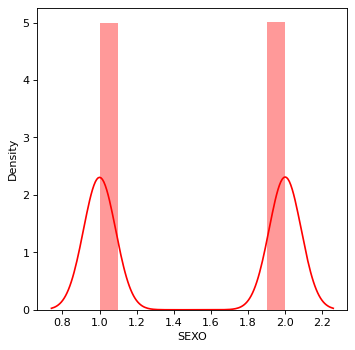

In [ ]:
plt.figure(figsize=(5,5), dpi = 80) 
sns.distplot(df_entsex.SEXO, color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


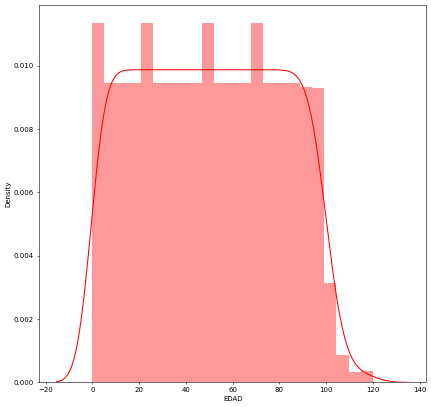

In [ ]:
plt.figure(figsize=(10,10), dpi = 50) 
sns.distplot(df_entsex.EDAD, color='red')

Text(0, 0.5, 'Edad')

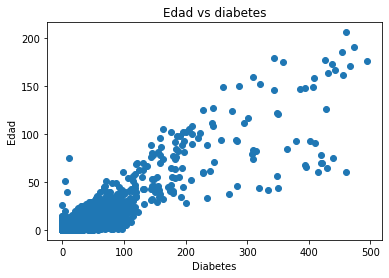

In [ ]:
# Gráfico de dispersión 
plt.scatter(df_entsex["DIABETES"], df_entsex["INTUBADO"])
plt.title("Edad vs diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Edad")

In [ ]:
!pip install dataprep

     |████████████████████████████████| 2.1 MB 5.2 MB/s 
     |████████████████████████████████| 63 kB 2.8 MB/s 
     |████████████████████████████████| 1.1 MB 48.8 MB/s 
     |████████████████████████████████| 719 kB 68.0 MB/s 
     |████████████████████████████████| 10.1 MB 29.9 MB/s 
     |████████████████████████████████| 943 kB 52.4 MB/s 
     |████████████████████████████████| 848 kB 44.1 MB/s 
     |████████████████████████████████| 366 kB 47.2 MB/s 
     |████████████████████████████████| 158 kB 57.9 MB/s 
     |████████████████████████████████| 1.5 MB 23.7 MB/s 
     |████████████████████████████████| 192 kB 61.8 MB/s 
     |████████████████████████████████| 160 kB 61.6 MB/s 
     |████████████████████████████████| 271 kB 58.6 MB/s 
     |████████████████████████████████| 132 kB 64.9 MB/s 
     |████████████████████████████████| 49 kB 6.6 MB/s 
     |████████████████████████████████| 1.5 MB 50.7 MB/s 
     |████████████████████████████████| 743 kB 52.6 MB/s 
  Created wheel fo

In [ ]:
from dataprep.eda import create_report
report = create_report(df_entsex, title='EDA')

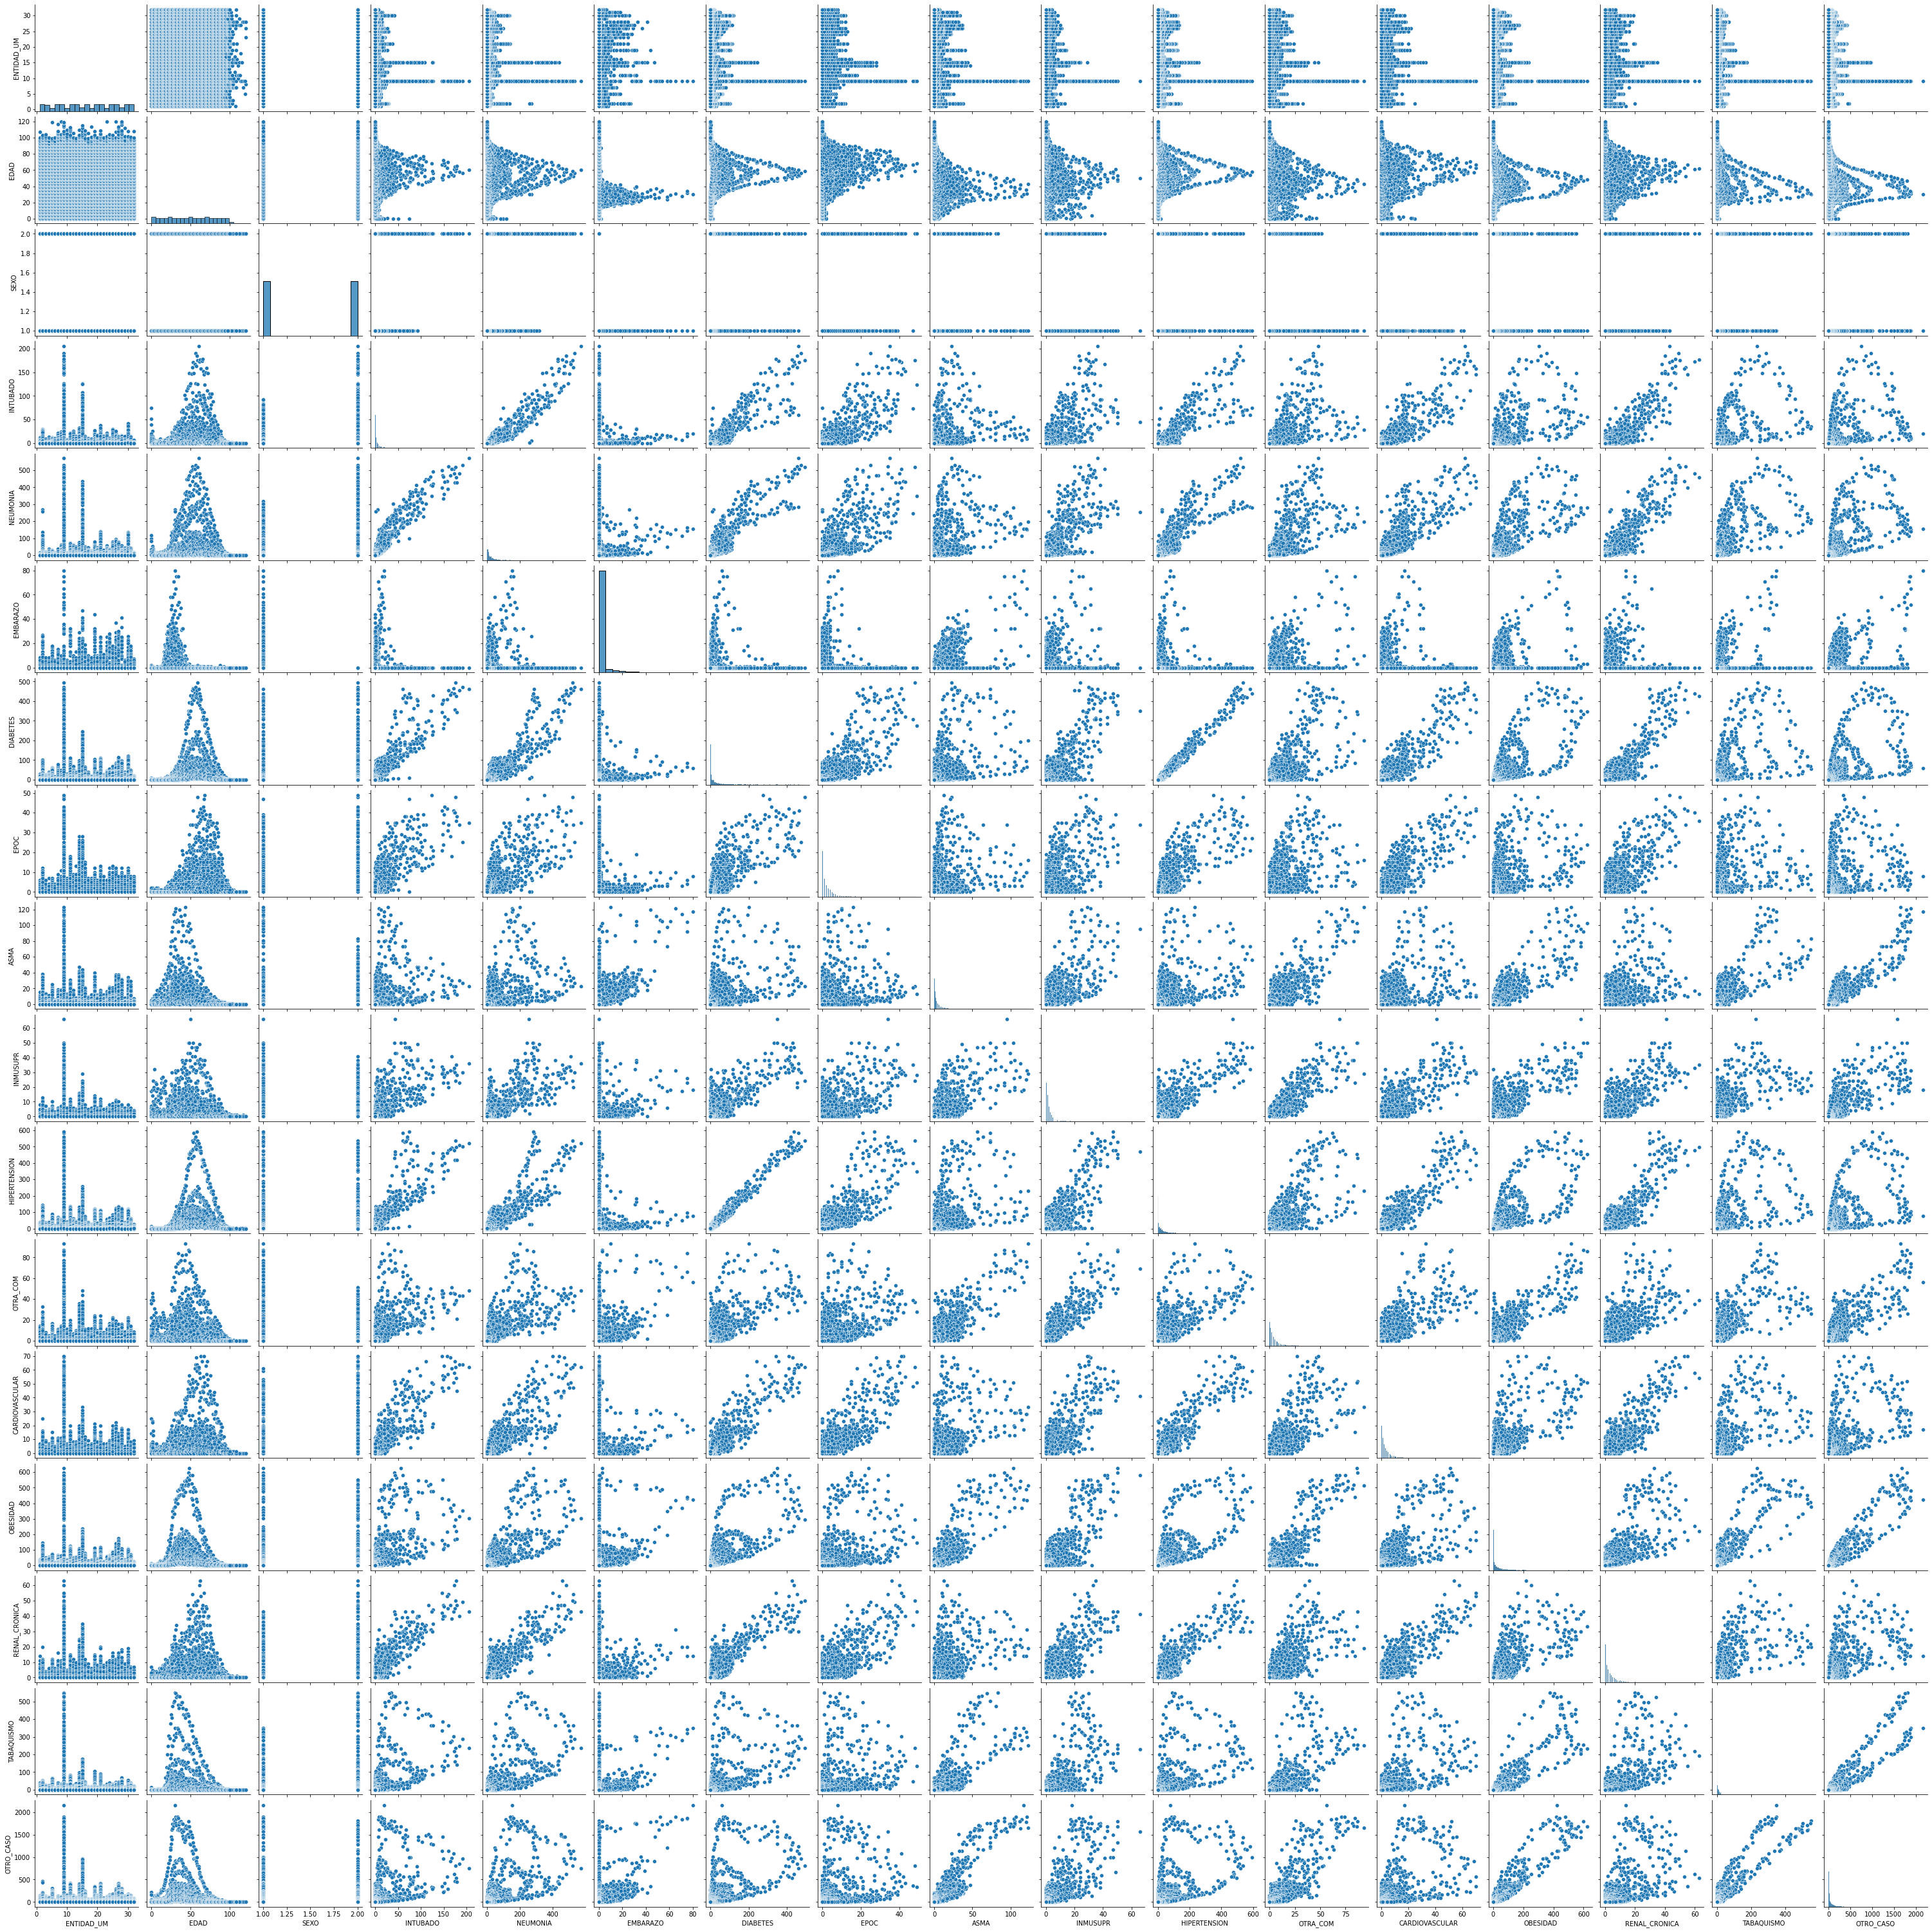

In [ ]:
# Obtenemos gráficos de dispersión 
sns.pairplot(df_entsex)

In [ ]:
# Mostramos correlación 
df_entsex.corr()

,ENTIDAD_UM,EDAD,SEXO,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO
ENTIDAD_UM,1.000000,0.002152,0.001826,-0.080881,-0.061490,-0.026288,-0.066739,-0.078489,-0.075152,-0.095889,-0.070344,-0.098570,-0.093672,-0.076210,-0.066382,-0.095259,-0.092198
EDAD,0.002152,1.000000,0.000210,0.044741,0.025563,-0.154151,0.038452,0.166490,-0.169276,-0.090079,0.042816,-0.133028,0.057195,-0.114577,0.009948,-0.093093,-0.121587
SEXO,0.001826,0.000210,1.000000,0.109945,0.082080,-0.184479,-0.018189,-0.010731,-0.096425,-0.044338,-0.029399,-0.104664,0.014003,-0.042913,0.041091,0.061957,-0.023353
INTUBADO,-0.080881,0.044741,0.109945,1.000000,0.928748,-0.005370,0.851317,0.826147,0.322328,0.714403,0.831329,0.631610,0.881030,0.557238,0.862224,0.472488,0.465004
NEUMONIA,-0.061490,0.025563,0.082080,0.928748,1.000000,0.089135,0.857025,0.810981,0.466963,0.793723,0.840618,0.743679,0.874475,0.693919,0.920374,0.579491,0.587437
EMBARAZO,-0.026288,-0.154151,-0.184479,-0.005370,0.089135,1.000000,0.029781,0.021342,0.615263,0.252727,0.030197,0.381248,0.140888,0.384431,0.173104,0.359410,0.513609
DIABETES,-0.066739,0.038452,-0.018189,0.851317,0.857025,0.029781,1.000000,0.831339,0.498401,0.872172,0.993744,0.762434,0.924230,0.734643,0.885805,0.501003,0.590339
EPOC,-0.078489,0.166490,-0.010731,0.826147,0.810981,0.021342,0.831339,1.000000,0.346296,0.718945,0.849548,0.625721,0.900755,0.510908,0.818723,0.369999,0.424033
ASMA,-0.075152,-0.169276,-0.096425,0.322328,0.466963,0.615263,0.498401,0.346296,1.000000,0.777301,0.513289,0.815220,0.568723,0.893038,0.598362,0.829366,0.951775
INMUSUPR,-0.095889,-0.090079,-0.044338,0.714403,0.793723,0.252727,0.872172,0.718945,0.777301,1.000000,0.880685,0.906054,0.875630,0.882229,0.872755,0.698343,0.823947


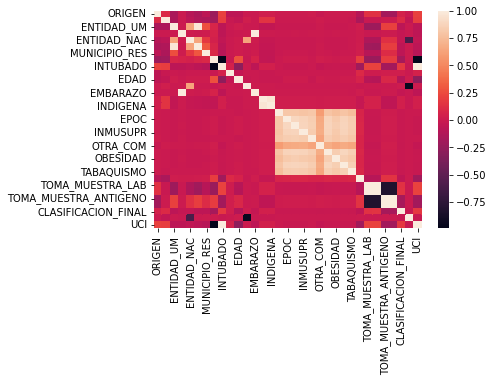

In [ ]:
# Mapa de calor 
sns.heatmap(df.corr())

Se puede apreciar una mayor correlación de los sujetos intubados con las variables de neumonía, cardiovascular, renal crónica, diabetes e hipertensió


Text(0, 0.5, 'Neumonía')

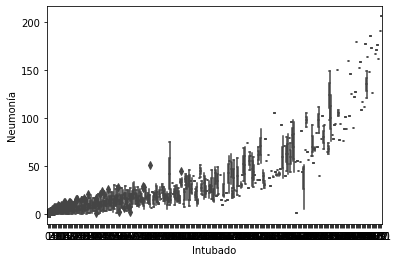

In [ ]:
# Diagrama de cajas y bigotes
ax = sns.boxplot(x = df_entsex["NEUMONIA"], y = df_entsex["INTUBADO"])
ax.set_xlabel('Intubado')
ax.set_ylabel('Neumonía')

Modelo de regresión univariada

In [ ]:
linear_univ_mod = LinearRegression().fit(df_entsex[['EPOC']], df_entsex[['EDAD']])
print("El intercepto de la regresión es {}. La pendiente de la regresión es {}.".format(round(linear_univ_mod.intercept_[0], 1), round(linear_univ_mod.coef_[0][0], 1)))

El intercepto de la regresión es 51.2. La pendiente de la regresión es 0.2.


In [ ]:
df_entsex[['predicted_linear_univ']] = pd.DataFrame(linear_univ_mod.predict(df_entsex[['EPOC']]))